In [1]:
# Import libraries needed to execute the code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import the clean data
data = pd.read_csv('source/data_balanced.csv', low_memory=False)

In [3]:
data.drop('vehicleID', axis=1, inplace=True)
data.drop('num_veh', axis=1, inplace=True)
data.drop('AccID', axis=1, inplace=True)

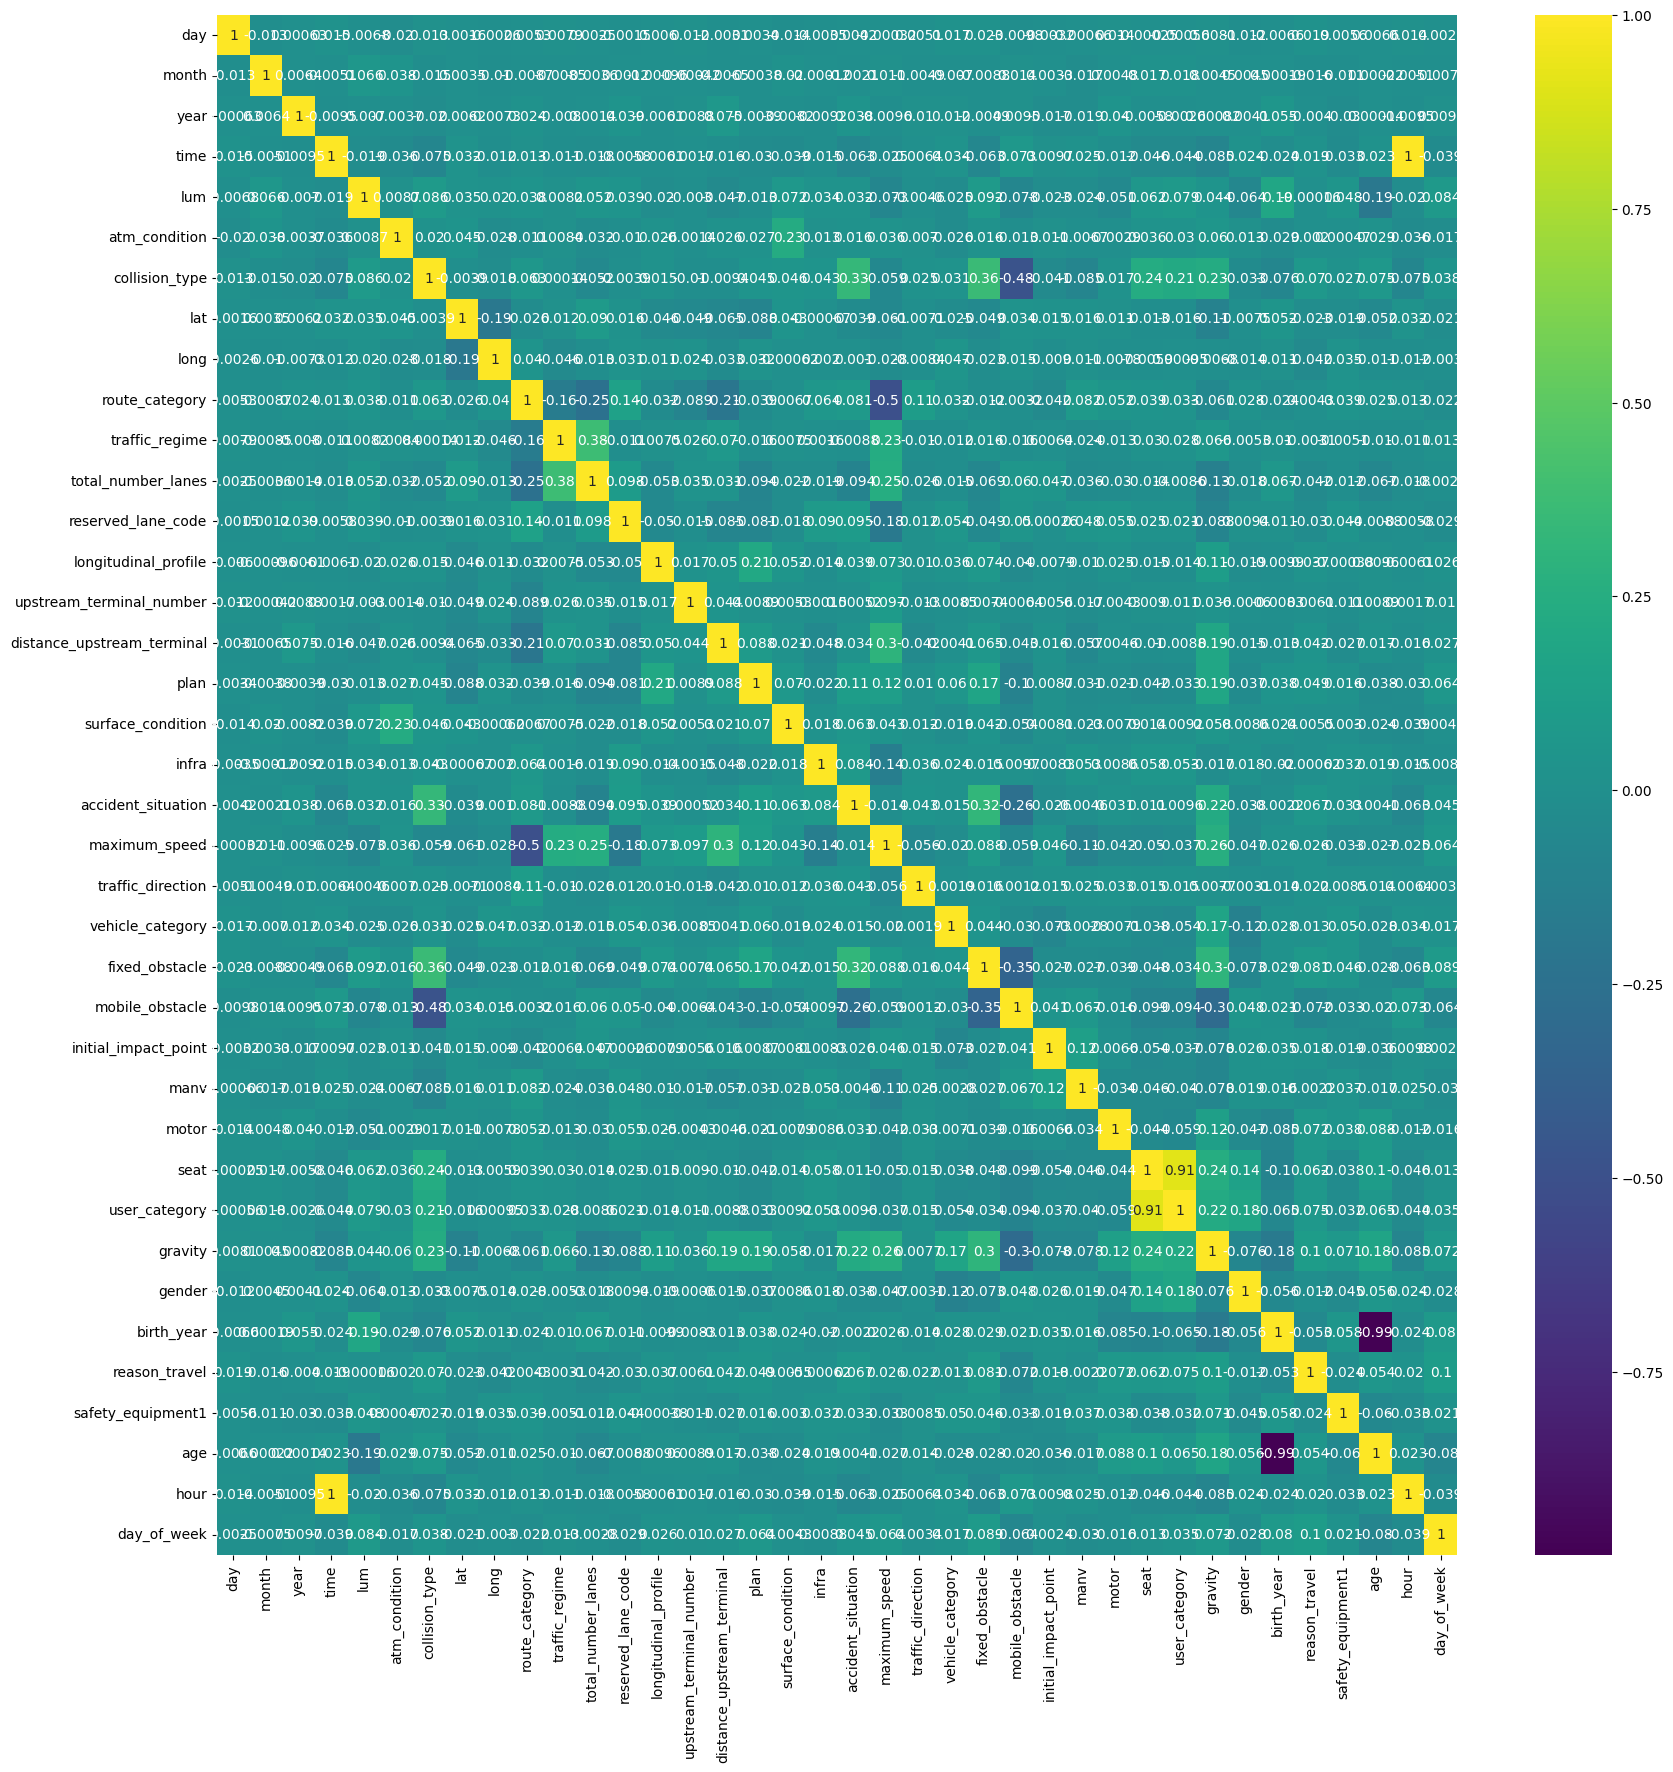

In [4]:
# Insert your code here
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='viridis');

In [5]:
# Target variable: 'gravity'
target = data['gravity']

# Deletion of 'diagnosis'
data.drop('gravity', axis=1, inplace=True)


  


In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Z = sc.fit_transform(data)
Z

array([[ 1.63472777,  1.26182166, -1.32123206, ...,  0.79634438,
        -2.14133277,  0.98381031],
       [ 1.40540805,  1.26182166, -1.32123206, ..., -0.99012384,
         0.23610424, -0.03783132],
       [ 1.40540805,  1.26182166, -1.32123206, ...,  0.4583639 ,
         0.23610424, -0.03783132],
       ...,
       [-1.46108851,  0.07743794,  1.29475891, ...,  1.37573947,
        -0.24908698,  1.49463113],
       [ 1.17608832, -0.21865799,  1.29475891, ..., -0.89355799,
         0.38166161,  1.49463113],
       [ 1.63472777,  0.07743794, -0.44923507, ...,  1.56887117,
        -0.83131646, -0.03783132]])

In [7]:
from sklearn.decomposition import PCA

pca = PCA()

# Contains the coordinates of the ACP on the lines.
Coord = pca.fit_transform(Z)

Explained variance ratio : [2.50747887e+00 2.31318549e+00 2.09429779e+00 1.93095723e+00
 1.86347575e+00 1.40505456e+00 1.30563990e+00 1.20065217e+00
 1.16800144e+00 1.14073986e+00 1.08971812e+00 1.05592358e+00
 1.00900960e+00 1.00485023e+00 9.94690136e-01 9.88066598e-01
 9.70478956e-01 9.67555362e-01 9.52207669e-01 9.26542481e-01
 8.98563942e-01 8.67428529e-01 8.46114019e-01 8.16835695e-01
 7.98834575e-01 7.89698833e-01 7.69026093e-01 7.48191964e-01
 7.20907658e-01 6.75352082e-01 6.00820773e-01 5.53151059e-01
 4.92239006e-01 4.35300359e-01 8.70870314e-02 1.19240007e-02
 9.71569673e-05]


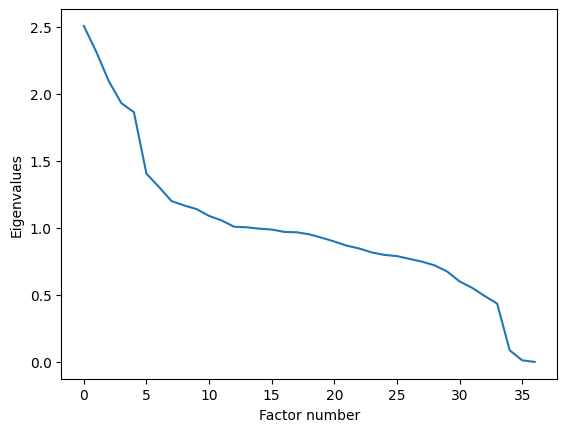

In [9]:
print('Explained variance ratio :', pca.explained_variance_)

# plt.figure(figsize=(10, 10))
plt.plot(range(0, 37), pca.explained_variance_)
plt.xlabel('Factor number')
plt.ylabel('Eigenvalues');

Ratios are : [6.77695187e-02 6.25183603e-02 5.66024921e-02 5.21878943e-02
 5.03640754e-02 3.79743465e-02 3.52874707e-02 3.24499722e-02
 3.15675225e-02 3.08307248e-02 2.94517625e-02 2.85383991e-02
 2.72704571e-02 2.71580419e-02 2.68834456e-02 2.67044315e-02
 2.62290911e-02 2.61500753e-02 2.57352738e-02 2.50416220e-02
 2.42854472e-02 2.34439518e-02 2.28678855e-02 2.20765816e-02
 2.15900661e-02 2.13431548e-02 2.07844336e-02 2.02213506e-02
 1.94839389e-02 1.82527104e-02 1.62383560e-02 1.49499888e-02
 1.33037215e-02 1.17648432e-02 2.35369728e-03 3.22269430e-04
 2.62585698e-06]


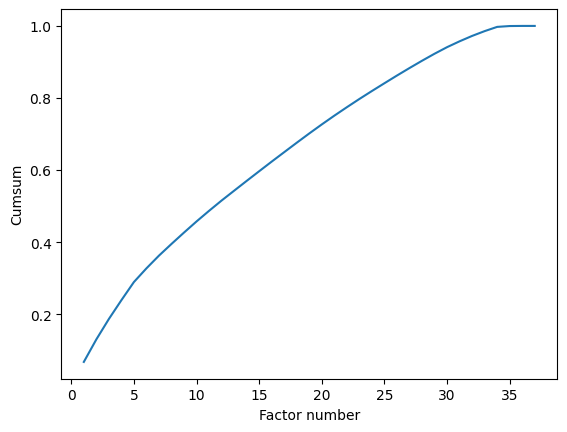

In [10]:
print('Ratios are :', pca.explained_variance_ratio_)
# Cumulative sum of explained variance plot
plt.plot(np.arange(1, 38), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Factor number')
plt.ylabel('Cumsum');

([<matplotlib.patches.Wedge at 0x2691857efd0>,
 [Text(1.072907961809824, 0.2426283278701998, 'PC1'),
  Text(0.8757138885870138, 0.6656764869933527, 'PC2'),
  Text(0.5559999066777771, 0.9491386114653135, 'PC3'),
  Text(0.18923278541140043, 1.0836009195849932, 'PC4'),
  Text(-0.1792193491857168, 1.0853019970853497, 'PC5'),
  Text(-0.4819827654199926, 0.9887834008710383, 'PC6'),
  Text(-0.5238014602719105, -0.9672807401251274, 'Others')],
 [Text(0.5852225246235404, 0.13234272429283625, '7.079%'),
  Text(0.477662121047462, 0.36309626563273784, '6.531%'),
  Text(0.30327267636969657, 0.517711969890171, '5.913%'),
  Text(0.10321788295167295, 0.5910550470463599, '5.452%'),
  Text(-0.09775600864675461, 0.5919829075010997, '5.261%'),
  Text(-0.2628996902290868, 0.5393364004751118, '3.967%'),
  Text(-0.2857098874210421, -0.5276076764318877, '65.798%')])

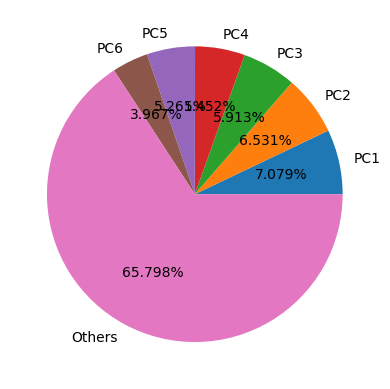

In [11]:
# Pie chart of the distribution of the explained variance ratio by each axis.
L1 = list(pca.explained_variance_ratio_[0:6])
L1.append(sum(pca.explained_variance_ratio_[6:31]))

plt.pie(L1, labels=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'Others'], 
        autopct='%1.3f%%')


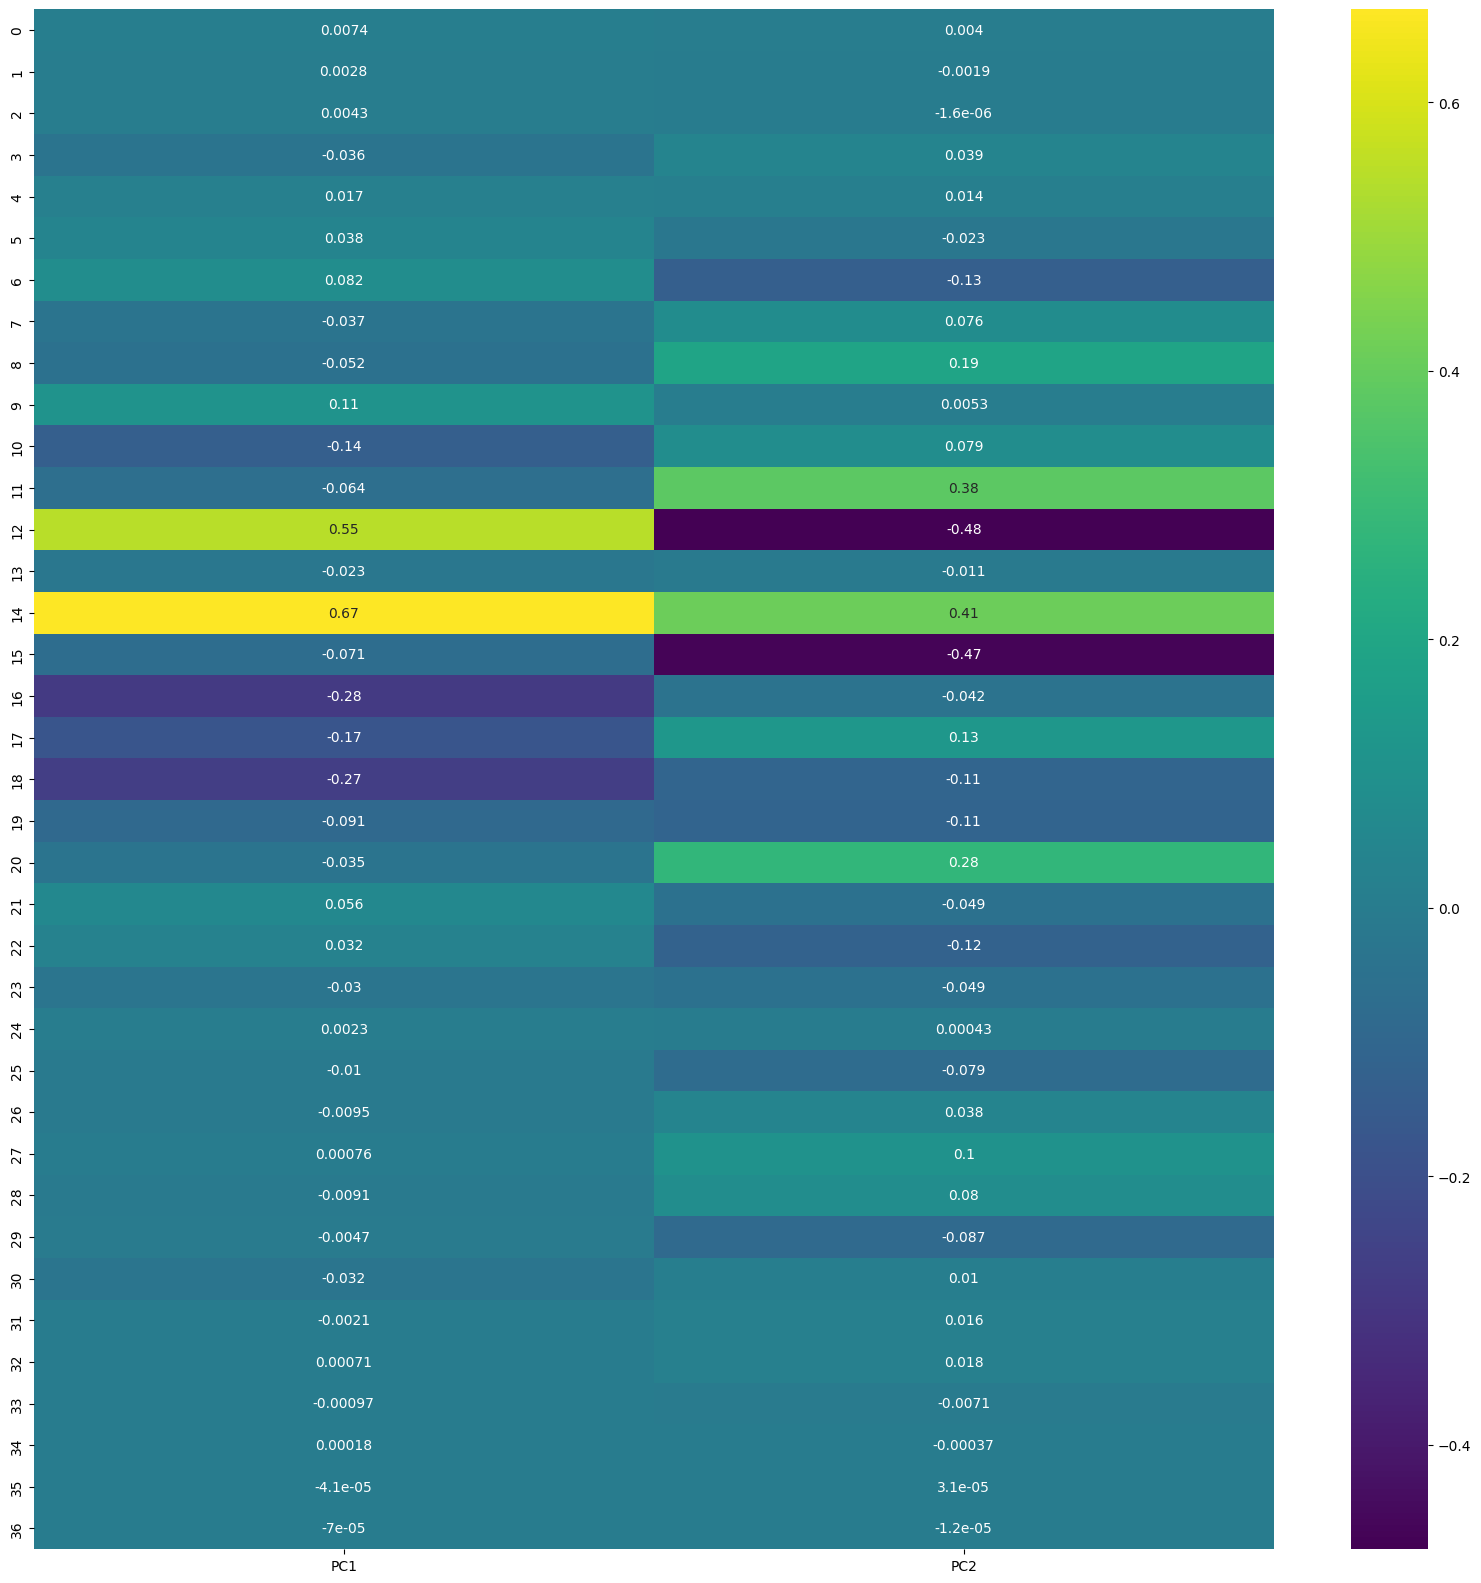

In [12]:
Comp_PCA = pd.DataFrame({'PC1': pca.components_[:, 0], 'PC2': pca.components_[:, 1]})

plt.figure(figsize=(20, 20))

sns.heatmap(Comp_PCA, annot=True, cmap='viridis');

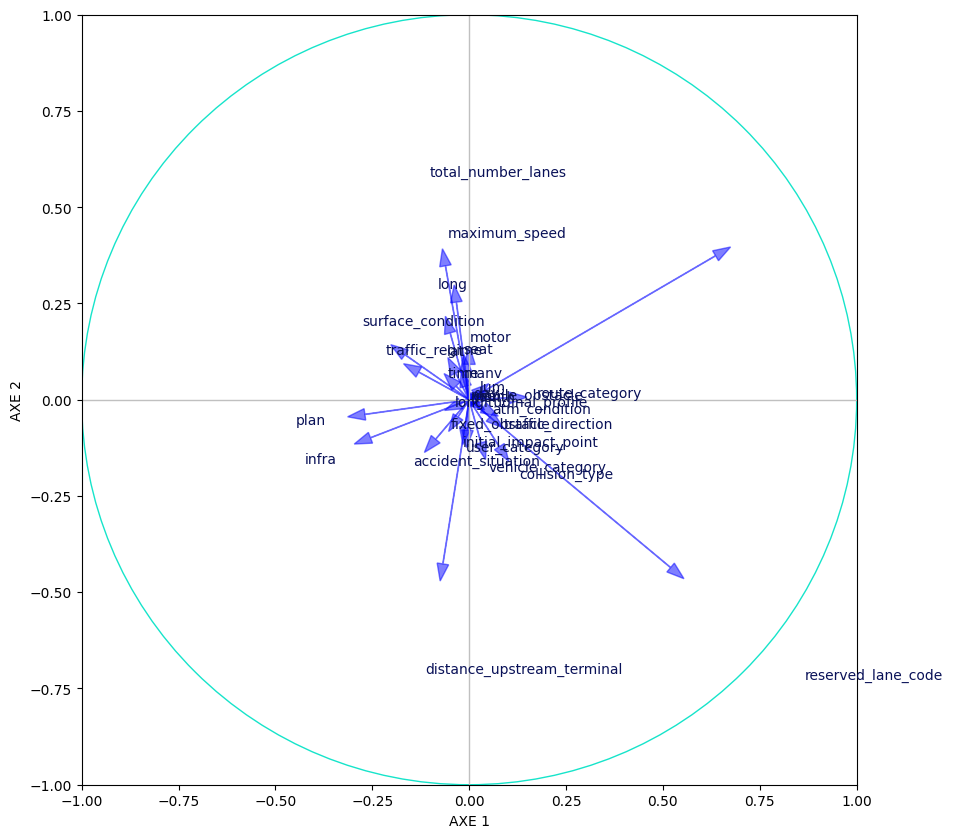

In [14]:
racine_valeurs_propres = np.sqrt(pca.explained_variance_)
corvar = np.zeros((37, 37))
for k in range(37):
    corvar[:, k] = pca.components_[:, k] * racine_valeurs_propres[k]

# Define the figure
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Display variables
for j in range(30):
    plt.annotate(data.columns[j], (corvar[j, 0], corvar[j, 1]), color='#091158')
    plt.arrow(0, 0, corvar[j, 0]*0.6, corvar[j, 1]*0.6, alpha=0.5, head_width=0.03, color='b')

# Add axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

# Circle and legends
cercle = plt.Circle((0, 0), 1, color='#16E4CA', fill=False)
axes.add_artist(cercle)
plt.xlabel('AXE 1')
plt.ylabel('AXE 2');

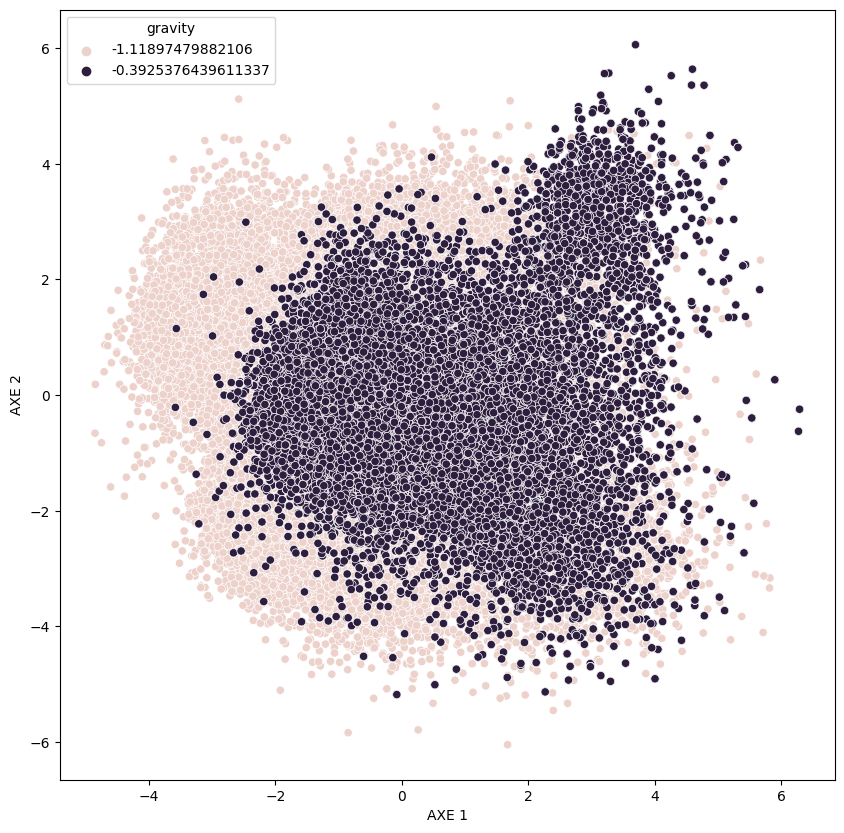

In [15]:
PCA_mat = pd.DataFrame({'AXE 1': Coord[:, 0], 'AXE 2': Coord[:, 1], 'target': target})
plt.figure(figsize=(10, 10))

sns.scatterplot(x='AXE 1', y='AXE 2', hue=target, data=PCA_mat);
